In [1]:
import pandas as pd
import numpy as np

#for Label Encoding
from sklearn.preprocessing import LabelEncoder

#for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for Data splitting
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
daf = pd.read_csv(r'C:\Users\Acer\Desktop\Machine Learning Models\Dataset\URL_ExtractedFeatures.csv')
daf.shape

(11430, 30)

# Dataframe Splitting

In [3]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def generate_accuracy_and_heatmap(model, x, y):
    cm = confusion_matrix(y,model.predict(x))
    sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['status_enc'],name='Actual')))
    return 1

In [5]:
numerical_feature_columns = list(daf._get_numeric_data().columns)
numerical_feature_columns

['status_enc',
 'url_length',
 'url_dot',
 'url_slash',
 'url_hyphen',
 'url_at',
 'url_underline',
 'url_plus',
 'url_hashtag',
 'url_digits',
 'url_special',
 'url_percent',
 'url_equal',
 'url_and',
 'domain_length',
 'domain_sub',
 'domain_top',
 'domain_port',
 'domain_digits',
 'domain_scheme',
 'domain_dots',
 'domain_vowels',
 'dir_presence',
 'dir_length',
 'dir_filetype',
 'filetype_length',
 'query_presence',
 'query_length',
 'prefix_suffix',
 'short_url']

In [6]:
target = 'status_enc'

<AxesSubplot:>

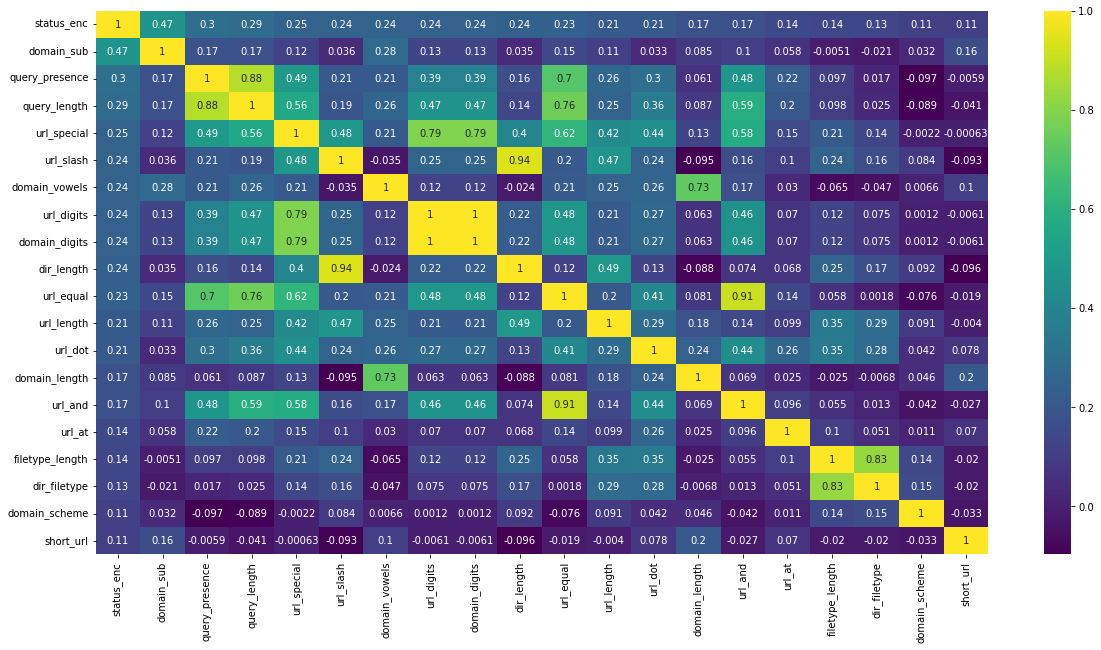

In [7]:
k = 20 #number of variables for heatmap
cols = daf[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = daf[cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [8]:
X = daf.loc[:, daf.columns != target]
Y = daf.loc[:, daf.columns == target]

In [9]:
X.shape

(11430, 29)

In [10]:
Y.shape

(11430, 1)

In [11]:
X

,url_length,url_dot,url_slash,url_hyphen,url_at,url_underline,url_plus,url_hashtag,url_digits,url_special,...,domain_dots,domain_vowels,dir_presence,dir_length,dir_filetype,filetype_length,query_presence,query_length,prefix_suffix,short_url
0,0,3,3,0,0,0,0,0,0,37,...,2,5,1,1,1,2,0,0,1,0
1,1,1,5,0,0,0,0,0,17,77,...,1,8,1,3,0,1,0,0,1,0
2,1,4,5,1,0,2,0,0,19,126,...,4,17,1,3,0,1,1,3,0,0
3,0,2,2,0,0,0,0,0,0,18,...,2,3,0,0,0,1,0,0,1,0
4,1,2,5,2,0,0,0,0,0,55,...,2,4,1,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1,2,4,0,0,0,0,0,0,45,...,2,4,1,2,0,1,0,0,1,0
11426,1,5,5,0,1,0,0,0,2,84,...,2,4,1,3,1,2,1,2,1,0
11427,1,2,5,6,0,1,0,0,15,105,...,2,5,1,3,0,1,1,1,1,0
11428,1,2,3,0,0,0,0,0,0,38,...,2,9,1,1,0,1,0,0,1,0


In [12]:
# Y = daf['status_enc']
# X = daf.drop('status_enc',axis=1)
# X.shape, Y.shape

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 , shuffle = False)

In [14]:
X_train.shape

(9144, 29)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(random_state=0 , max_depth=18)

classifier.fit(X_train, Y_train)

Y_predict = classifier.predict(X_test)

Accuracy is:  0.8547681539807525
F1 score is:  0.8500451671183379


Empty DataFrame
Columns: []
Index: []


1

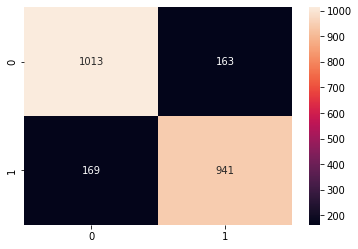

In [16]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)
generate_accuracy_and_heatmap(classifier, X_test, Y_test)

# FEATURE SELECTION

In [17]:
select_feature = SelectKBest(chi2, k=28).fit(X_train, Y_train)

In [18]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
16,domain_port,30933.814474
9,url_special,27824.224596
8,url_digits,25272.287479
17,domain_digits,25272.287479
26,query_length,1821.608818
11,url_equal,1607.101721
20,domain_vowels,1063.936193
12,url_and,1010.846373
14,domain_sub,894.344814
22,dir_length,719.219376


In [19]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [20]:
X_train.head(3)

,url_length,url_dot,url_slash,url_hyphen,url_at,url_underline,url_plus,url_hashtag,url_digits,url_special,...,domain_dots,domain_vowels,dir_presence,dir_length,dir_filetype,filetype_length,query_presence,query_length,prefix_suffix,short_url
0,0,3,3,0,0,0,0,0,0,37,...,2,5,1,1,1,2,0,0,1,0
1,1,1,5,0,0,0,0,0,17,77,...,1,8,1,3,0,1,0,0,1,0
2,1,4,5,1,0,2,0,0,19,126,...,4,17,1,3,0,1,1,3,0,0


In [21]:
X_train_chi

array([[0, 3, 3, ..., 0, 1, 0],
       [1, 1, 5, ..., 0, 1, 0],
       [1, 4, 5, ..., 3, 0, 0],
       ...,
       [0, 2, 3, ..., 0, 1, 1],
       [1, 3, 5, ..., 0, 1, 0],
       [0, 2, 3, ..., 0, 1, 0]], dtype=int64)

<AxesSubplot:>

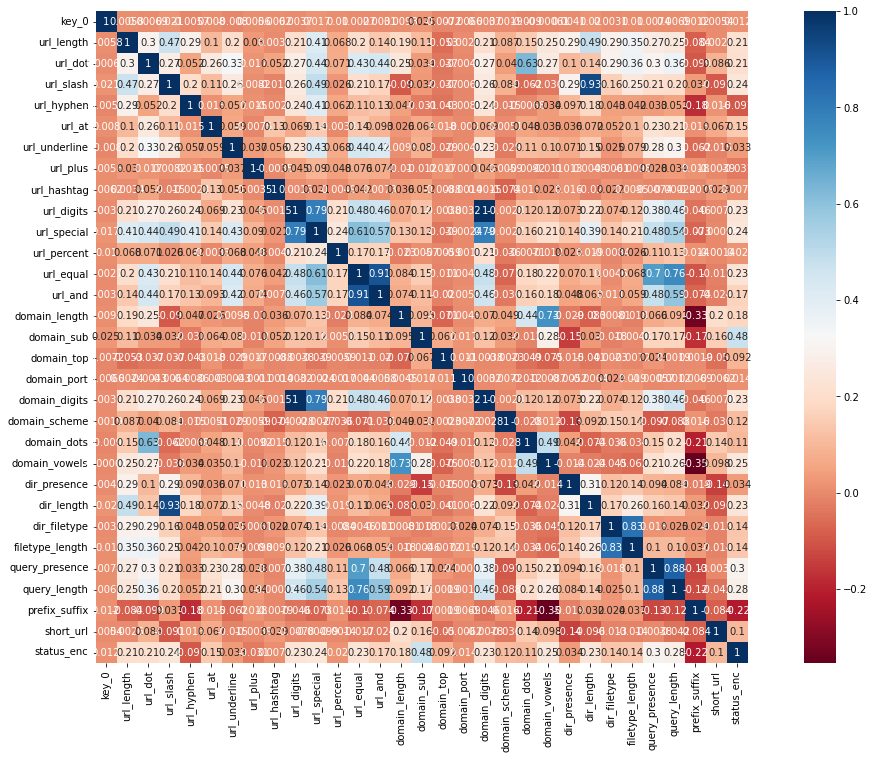

In [22]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,12))
plt.title('', y=2, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(), 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Model Training

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# classifier_DT = DecisionTreeClassifier(random_state=8 , max_depth=18)
classifier_DT=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, 
                                     random_state=0, splitter='best')
classifier_DT.fit(X_train_chi, Y_train)

Y_predict = classifier_DT.predict(X_test_chi)

In [24]:
# clf = classifier.fit(X_train, Y_train)
# tree.plot_tree(clf)

Accuracy is:  0.8503937007874016
F1 score is:  0.8452488687782806


Empty DataFrame
Columns: []
Index: []


1

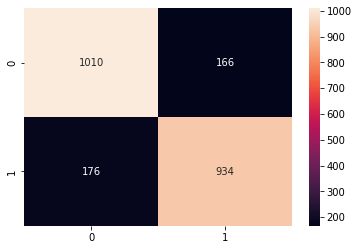

In [25]:
generate_accuracy_and_heatmap(classifier_DT, X_test_chi, Y_test)

## Support Vector Machine

In [26]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train_chi, Y_train)

SVC()

Accuracy is:  0.6535433070866141
F1 score is:  0.5000000000000001


Empty DataFrame
Columns: []
Index: []


1

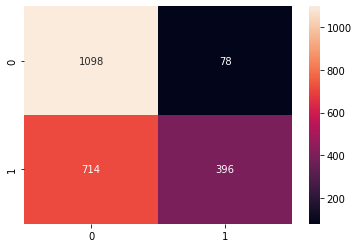

In [27]:
generate_accuracy_and_heatmap(clf_svm, X_test_chi, Y_test)

## Nu-Support Vector Classification.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
clf_nsvc = make_pipeline(StandardScaler(), NuSVC())
clf_nsvc.fit(X_train_chi, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

Accuracy is:  0.8180227471566054
F1 score is:  0.8196010407632264


Empty DataFrame
Columns: []
Index: []


1

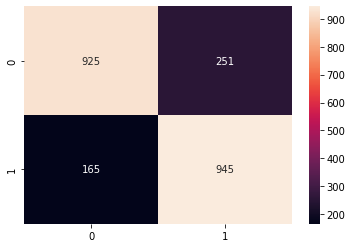

In [29]:
generate_accuracy_and_heatmap(clf_nsvc, X_test_chi, Y_test)

## Stochastic Gradient Descent

In [30]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier()
clf_sgd.fit(X_train_chi, Y_train)

SGDClassifier()

Accuracy is:  0.5485564304461942
F1 score is:  0.6802973977695168


Empty DataFrame
Columns: []
Index: []


1

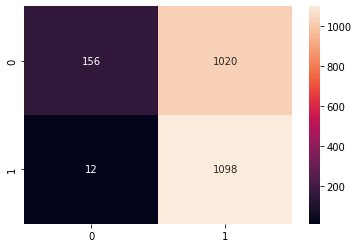

In [31]:
generate_accuracy_and_heatmap(clf_sgd, X_test_chi, Y_test)

## Gaussian Process Classification

In [32]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf_gpc = GaussianProcessClassifier()
clf_gpc.fit(X_train_chi, Y_train)

GaussianProcessClassifier()

Accuracy is:  0.8307086614173228
F1 score is:  0.8235294117647058


Empty DataFrame
Columns: []
Index: []


1

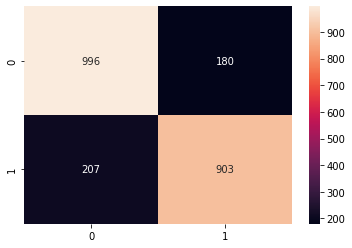

In [33]:
generate_accuracy_and_heatmap(clf_gpc, X_test_chi, Y_test)

## Multi-layer Perceptron

In [34]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()

clf_mlp.fit(X_train_chi, Y_train)

MLPClassifier()

Accuracy is:  0.8569553805774278
F1 score is:  0.8491001384402399


Empty DataFrame
Columns: []
Index: []


1

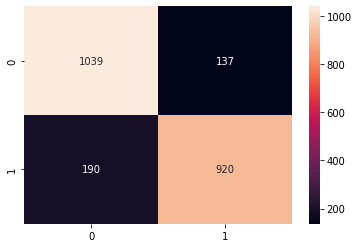

In [35]:
generate_accuracy_and_heatmap(clf_mlp, X_test_chi, Y_test)

## Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier()

clf_adaboost.fit(X_train_chi, Y_train)

AdaBoostClassifier()

Accuracy is:  0.8359580052493438
F1 score is:  0.8286888990406579


Empty DataFrame
Columns: []
Index: []


1

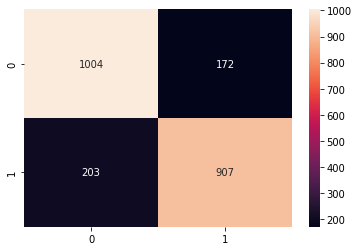

In [37]:
generate_accuracy_and_heatmap(clf_adaboost, X_test_chi, Y_test)

In [38]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_chi, Y_train)

[19:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy is:  0.884076990376203
F1 score is:  0.8815377738042021


Empty DataFrame
Columns: []
Index: []


1

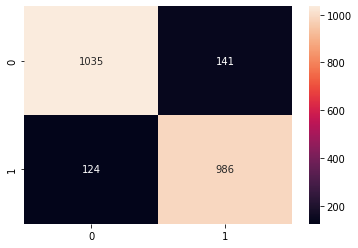

In [39]:
generate_accuracy_and_heatmap(xgb_clf, X_test_chi, Y_test)

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)
 
clf_knn.fit(X_train_chi, Y_train)

KNeighborsClassifier()

Accuracy is:  0.820647419072616
F1 score is:  0.8136363636363636


Empty DataFrame
Columns: []
Index: []


1

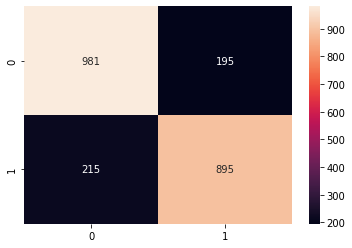

In [41]:
generate_accuracy_and_heatmap(clf_knn, X_test_chi, Y_test)

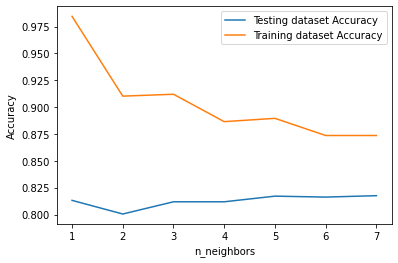

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
 
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

    
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()

clf_rf.fit(X_train_chi, Y_train)

RandomForestClassifier()

Accuracy is:  0.8792650918635171
F1 score is:  0.8766756032171582


Empty DataFrame
Columns: []
Index: []


1

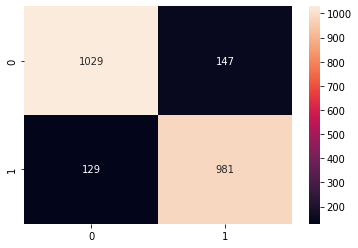

In [44]:
generate_accuracy_and_heatmap(clf_rf, X_test_chi, Y_test)